## Infinite Overlapping Mixture Model with Binary clusters

In [4]:
%load_ext autoreload
%autoreload 2
import utils, iomm

### Synthetic Data

In [487]:
#Generate synthetic data
K=6
N=10
D=8
N_iter=1000
alpha_prior = 4
burning_period=200

Z = utils.random_z(N,K)
X = utils.random_x(N,D)
theta= utils.random_theta(N,K,D,alpha_prior)

In [471]:
Z

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.]])

In [472]:
X

array([[ 0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.],
       [ 0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.]])

In [473]:
theta

array([[  1.92904238e-01,   3.19671534e-01,   1.61506533e-02,
          6.18996186e-01,   1.52513929e-02,   5.66922711e-01,
          4.19646677e-01,   1.85363008e-02],
       [  5.45139375e-01,   6.28460311e-01,   4.42123163e-01,
          7.86764708e-01,   7.99606759e-01,   5.12224569e-01,
          1.57123962e-01,   2.36440086e-01],
       [  4.48322607e-02,   5.20227573e-01,   7.74784948e-02,
          1.54691212e-01,   1.65092891e-01,   2.72202759e-01,
          7.29718861e-01,   8.41916742e-01],
       [  3.03636978e-01,   3.91953842e-01,   6.97568586e-01,
          1.36392594e-02,   6.67874538e-01,   2.83409975e-01,
          5.10427037e-01,   5.74783688e-01],
       [  1.86008758e-01,   9.27635520e-02,   1.27169237e-01,
          4.68875426e-02,   5.46810435e-01,   5.12710865e-01,
          3.05039685e-01,   1.30421844e-02],
       [  3.33274781e-01,   3.42159524e-01,   6.52100827e-04,
          5.18670245e-02,   3.55680542e-01,   2.10970615e-01,
          9.88074791e-01,   5.1

#### IOMM algorithm

In [488]:
IOMM = iomm.IOMM(N = N, 
                 K = K, 
                 D = D, 
                 N_iter = N_iter, 
                 Z = Z, 
                 X = X, 
                 theta = theta, 
                 alpha_prior = alpha_prior, 
                 omega = 1,
                 copy_rows = 4,
                 burning_period=burning_period)

In [489]:
%%capture
Z_hat,theta_resampled,Z_hat_mean = IOMM.learning(apply_log=False,random_walk=False)

In [476]:
Z_hat

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  0.,  1.]])

In [477]:
Z

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.]])

In [478]:
Z-Z_hat

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [-1., -1.,  0.,  0.,  0., -1.],
       [ 0., -1.,  0., -1.,  0., -1.],
       [-1., -1., -1., -1.,  0.,  0.],
       [-1.,  0., -1., -1.,  1., -1.],
       [-1., -1., -1.,  0.,  0.,  0.],
       [-1., -1., -1., -1.,  1., -1.]])

In [479]:
theta_evol=np.zeros([N_iter,K*D])
theta_evol_mean=np.zeros([N_iter,K*D])
temp=0
ind_evol=0
for n in range(N_iter):
    ind_evol=0
    for d in range(D):
        for k in range(K):
            theta_evol[n,ind_evol]=theta_resampled[n][k,d]
            ind_evol=ind_evol+1

for n in range(N_iter):
    for ind in range(K*D):
        theta_evol_mean[n,ind]=np.sum(theta_evol[:n,ind])/(n+1)

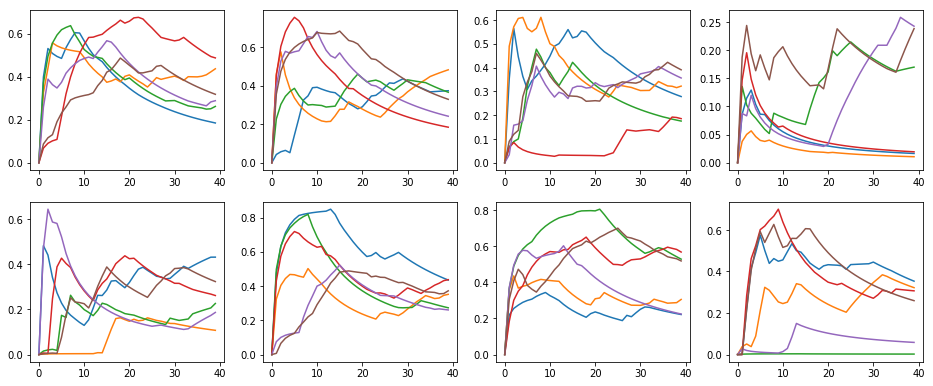

In [466]:
fig=plt.figure(figsize=(16,10))

for d in range(D):
    ax=fig.add_subplot(3,4,d+1)
    for kd in range(K*(d),K*(d+1)):
        ax.plot(range(N_iter),theta_evol_mean[:,kd])
plt.show()

In [490]:
#we compute the U matrix N*N showing the number of shared clusters between each data point
U_hat=np.around(np.dot(Z_hat_mean,Z_hat_mean.T),0)
print(U_hat)
U=np.dot(Z,Z.T)
print(U)

[[ 2.  1.  1.  0.  2.  2.  2.  2.  2.  2.]
 [ 1.  1.  1.  0.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  2.  0.  2.  2.  2.  2.  2.  2.]
 [ 0.  0.  0.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  1.  2.  1.  4.  4.  4.  4.  4.  4.]
 [ 2.  1.  2.  1.  4.  4.  4.  4.  4.  4.]
 [ 2.  1.  2.  1.  4.  4.  4.  4.  4.  4.]
 [ 2.  1.  2.  1.  4.  4.  4.  4.  4.  4.]
 [ 2.  1.  2.  1.  4.  4.  4.  4.  4.  4.]
 [ 2.  1.  2.  1.  4.  4.  4.  4.  4.  4.]]
[[ 2.  1.  1.  0.  1.  0.  1.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  1.  2.  0.  0.  1.  0.  1.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  2.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  1.  0.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  2.]]


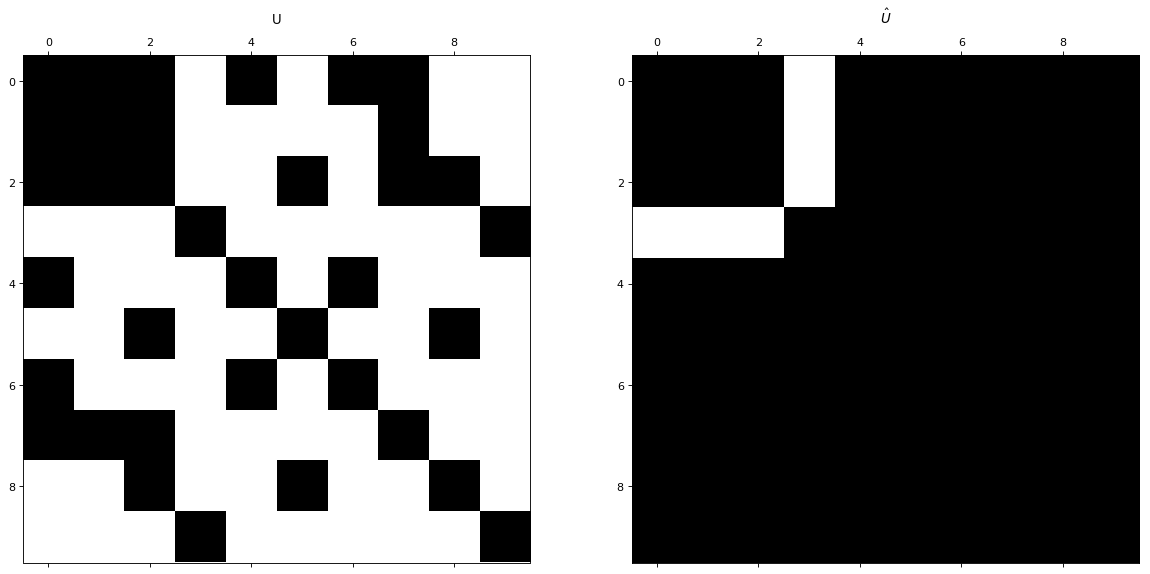

In [491]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.title.set_text('U')
ax2.title.set_text('$\hat{U}$')

ax1.spy(U)
ax2.spy(U_hat)

plt.show()

In [398]:
#summmary statistics
U_diff=abs(U-U_hat)
print("% of pairs having same number of clusters:",len(U_diff[U_diff<0])/(N*N))
print("% of pairs having at most 1 cluster difference:",len(U_diff[U_diff<1])/(N*N))
print("% of pairs having at most 2 clusters difference:",len(U_diff[U_diff<2])/(N*N))
print("% of pairs having at most 3 clusters difference:",len(U_diff[U_diff<3])/(N*N))

% of pairs having same number of clusters: 0.0
% of pairs having at most 1 cluster difference: 0.46
% of pairs having at most 2 clusters difference: 0.92
% of pairs having at most 3 clusters difference: 1.0
